In [46]:
import pandas as pd

# Load the generated CSV
df = pd.read_csv("synthetic_student_data.csv")

# Extract the first 3 students
first_50_students = df.iloc[:50]

In [47]:
# Get Student IDs of the first 3 students
student_ids = first_50_students["StudentID"].tolist()

# Initialize a graph dictionary
social_graph = {}

# Populate relationships for each student
for idx, row in first_50_students.iterrows():
    student_id = row["StudentID"]
    relationships = {
        "Friends": row["Friends"].split(", ") if pd.notna(row["Friends"]) else [],
        "Influential": row["Influential"].split(", ") if pd.notna(row["Influential"]) else [],
        "Feedback": row["Feedback"].split(", ") if pd.notna(row["Feedback"]) else [],
        "MoreTime": row["MoreTime"].split(", ") if pd.notna(row["MoreTime"]) else [],
        "Advice": row["Advice"].split(", ") if pd.notna(row["Advice"]) else [],
        "Disrespect": row["Disrespect"].split(", ") if pd.notna(row["Disrespect"]) else [],
    }
    social_graph[student_id] = relationships

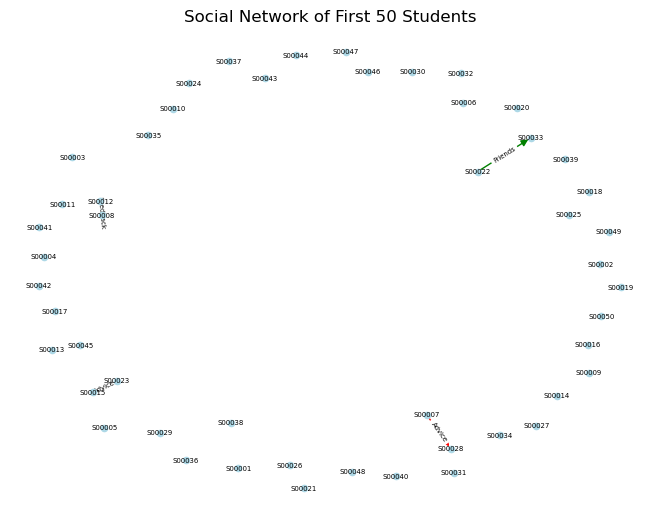

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define edge colors for relationship types
edge_colors = {
    "Friends": "green",
    "Influential": "purple",
    "Feedback": "blue",
    "MoreTime": "orange",
    "Advice": "red",
    "Disrespect": "brown"
}

# Add nodes and edges
for student, rels in social_graph.items():
    G.add_node(student)
    for rel_type, peers in rels.items():
        for peer in peers:
            if peer in student_ids:  # Only include first 3 students
                G.add_edge(student, peer, label=rel_type, color=edge_colors[rel_type])

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, "label")
edge_colors = [G[u][v]["color"] for u, v in G.edges()]

nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    edge_color=edge_colors, node_size=20, font_size=5
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("Social Network of First 50 Students")
plt.show()